In [0]:
import pandas as pd
%matplotlib inline

In [0]:
df = pd.read_csv('/content/minwagedata.csv')


In [151]:
print(df.head())

   Unnamed: 0  Year       State  ... CPI.Average High.2018  Low.2018
0           0  1968     Alabama  ...   34.783333      0.00      0.00
1           1  1968      Alaska  ...   34.783333     15.12     15.12
2           2  1968     Arizona  ...   34.783333      4.75      3.37
3           3  1968    Arkansas  ...   34.783333      1.12      1.12
4           4  1968  California  ...   34.783333     11.88     11.88

[5 rows x 10 columns]


In [152]:
gb=df.groupby('State')
gb.get_group("Alabama").set_index('Year').head()

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [153]:
# NOTE:
# we can convert pandas dataframe to python dictionary and vice-versa.

my_dict = dict(df)
print(my_dict)

{'Unnamed: 0': 0          0
1          1
2          2
3          3
4          4
        ... 
2745    2745
2746    2746
2747    2747
2748    2748
2749    2749
Name: Unnamed: 0, Length: 2750, dtype: int64, 'Year': 0       1968
1       1968
2       1968
3       1968
4       1968
        ... 
2745    2017
2746    2017
2747    2017
2748    2017
2749    2017
Name: Year, Length: 2750, dtype: int64, 'State': 0             Alabama
1              Alaska
2             Arizona
3            Arkansas
4          California
            ...      
2745         Virginia
2746       Washington
2747    West Virginia
2748        Wisconsin
2749          Wyoming
Name: State, Length: 2750, dtype: object, 'Table_Data': 0                       ...
1                      2.10
2       18.72 - 26.40/wk(b)
3               1.25/day(b)
4                   1.65(b)
               ...         
2745                7.25[c]
2746                  11.00
2747                   8.75
2748                   7.25
2749              

In [154]:
# Converting dictionary to pandas data-frame

Characters = {'DC':['Batman', 'Superman', 'Wonderwoman'], 'Marvel':['Captain America'
            ,'Ironman', 'Spiderman'], 'Raj':['Nagraj', 'Dhruv', 'Bheriya']}
print(Characters,'\n'*3)

Characters_df = pd.DataFrame(Characters)
print(Characters_df)

{'DC': ['Batman', 'Superman', 'Wonderwoman'], 'Marvel': ['Captain America', 'Ironman', 'Spiderman'], 'Raj': ['Nagraj', 'Dhruv', 'Bheriya']} 



            DC           Marvel      Raj
0       Batman  Captain America   Nagraj
1     Superman          Ironman    Dhruv
2  Wonderwoman        Spiderman  Bheriya


In [155]:
print(Characters_df.groupby('Raj').groups)

{'Bheriya': Int64Index([2], dtype='int64'), 'Dhruv': Int64Index([1], dtype='int64'), 'Nagraj': Int64Index([0], dtype='int64')}


In [156]:
print(Characters_df.groupby(['Raj', 'Marvel']).groups)

{('Bheriya', 'Spiderman'): Int64Index([2], dtype='int64'), ('Dhruv', 'Ironman'): Int64Index([1], dtype='int64'), ('Nagraj', 'Captain America'): Int64Index([0], dtype='int64')}


In [157]:
act_min_wage = pd.DataFrame()
for name, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage=group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name})
    else:
        act_min_wage=act_min_wage.join(group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name}))


print(act_min_wage.tail())

      Alabama  Alaska  Arizona  ...  West Virginia  Wisconsin  Wyoming
Year                            ...                                   
2013      0.0    8.33     8.38  ...           7.79       7.79     5.54
2014      0.0    8.20     8.36  ...           7.67       7.67     5.45
2015      0.0    9.24     8.50  ...           8.45       7.66     5.44
2016      0.0   10.17     8.40  ...           9.13       7.56     5.37
2017      0.0   10.01    10.22  ...           8.94       7.41     5.26

[5 rows x 55 columns]


In [158]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,1.980600,4.909800,8.076600,8.292800,6.93520,6.779200,6.301600,4.088800,3.674400,6.314400,0.0,8.191800,7.845600,8.762000,7.781400,6.656600,0.0,4.052000,5.863200,6.527800,7.583800,7.939000,8.116600,7.202200,8.298600,7.370200,6.995400,6.050400,5.48460,8.510600,7.844400,3.588400,8.323000,0.0,6.739600,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,3.561576,1.887927,1.229897,0.877401,1.00724,2.385091,1.275628,3.835916,2.466736,1.343869,0.0,0.938459,0.907239,1.121988,1.207345,1.244004,0.0,3.797229,2.251726,1.426518,0.866242,0.973408,0.882084,0.871331,1.361302,0.656855,0.870714,1.630708,2.39007,1.108701,0.852765,1.258745,0.981158,0.0,1.341918,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,0.000000,0.000000,6.220000,6.670000,4.41000,0.000000,3.830000,0.000000,0.000000,3.020000,0.0,6.510000,6.400000,6.890000,5.230000,3.490000,0.0,0.000000,0.000000,3.530000,6.060000,6.220000,6.420000,5.790000,6.180000,6.160000,4.650000,3.480000,2.04000,5.820000,6.400000,1.800000,6.390000,0.0,2.900000,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,0.000000,4.330000,7.110000,7.782500,6.42750,6.060000,5.200000,0.000000,3.082500,5.452500,0.0,7.512500,7.172500,7.932500,7.030000,6.115000,0.0,0.000000,4.707500,6.027500,6.995000,7.302500,7.512500,6.447500,7.172500,6.792500,6.412500,4.642500,2.58250,7.745000,7.302500,2.645000,7.715000,0.0,5.940000,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,0.000000,5.445000,7.795000,8.190000,7.07500,7.330000,6.285000,6.500000,3.735000,6.700000,0.0,8.065000,7.660000,8.705000,8.005000,6.895000,0.0,6.690000,5.950000,6.790000,7.465000,7.665000,8.070000,7.135000,8.195000,7.325000,7.175000,6.235000,6.80500,8.770000,7.705000,3.220000,8.230000,0.0,6.905000,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,0.000000,6.005000,8.802500,8.797500,7.71500,8.367500,7.490000,7.667500,4.562500,7.255000,0.0,8.585000,8.410000,9.385000,8.617500,7.550000,0.0,7.692500,7.432500,7.460000,8.007500,8.455000,8.675000,7.937500,9.352500,7.777500,7.655000,7.512500,7.33250,9.412500,8.327500,4.790000,8.912500,0.0,7.677500,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010

In [159]:
print(len(act_min_wage.columns))

55


In [160]:
issue_df = df[df['Low.2018']==0]
issue_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [161]:
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [0]:
act_min_wage.drop(columns=['Alabama'], inplace=True)

In [163]:
act_min_wage.head()



,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,0.0,0.00,9.00,9.00,8.28,0.00,8.28,0.0,0.0,4.68,0.0,10.08,7.20,11.52,9.00,5.04,0.0,0.0,0.00,7.20,9.00,10.08,10.08,8.28,11.52,7.20,7.20,5.40,7.20,9.00,8.28,3.10,10.08,0.0,3.06,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,0.0,0.00,8.53,8.53,7.85,0.00,7.85,0.0,0.0,4.44,0.0,9.56,6.83,10.92,8.53,4.78,0.0,0.0,0.00,6.83,8.53,9.56,9.56,7.85,10.92,6.83,6.83,5.12,6.83,8.53,7.85,2.94,9.56,0.0,2.90,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,0.0,0.00,10.32,10.32,8.06,0.00,8.06,0.0,0.0,4.19,0.0,10.32,8.38,10.32,8.06,4.51,0.0,0.0,0.00,6.45,8.38,9.35,9.67,8.38,10.32,8.06,6.45,4.84,6.45,8.06,8.38,2.77,10.32,0.0,6.45,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,0.0,0.00,9.89,9.89,7.73,0.00,7.73,0.0,0.0,4.02,0.0,9.89,8.04,9.89,7.73,4.33,0.0,0.0,0.00,6.18,8.04,8.97,9.28,8.04,9.89,7.73,6.18,4.64,6.18,7.73,8.04,2.66,9.89,0.0,6.18,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,0.0,7.49,11.38,9.58,8.38,8.38,7.49,0.0,0.0,3.89,0.0,8.38,9.58,10.48,9.58,4.49,0.0,0.0,9.58,5.99,9.58,9.58,8.98,7.78,11.08,8.68,5.99,4.49,8.38,7.49,9.58,3.89,9.58,0.0,5.99,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [164]:
act_min_wage['U.S. Virgin Islands']

Year
1968      NaN
1969      NaN
1970      NaN
1971      NaN
1972      NaN
1973      NaN
1974      NaN
1975      NaN
1976      NaN
1977      NaN
1978      NaN
1979    10.01
1980     9.42
1981     9.23
1982     8.69
1983     8.42
1984     8.07
1985     7.80
1986     7.65
1987     7.38
1988     7.09
1989     6.77
1990     6.42
1991     8.55
1992     8.30
1993     8.06
1994     7.86
1995     7.64
1996     7.42
1997     7.25
1998     7.14
1999     6.99
2000     6.25
2001     6.08
2002     5.99
2003     5.85
2004     5.70
2005     5.51
2006     5.34
2007     5.19
2008     5.00
2009     5.02
2010     4.94
2011     4.79
2012     4.69
2013     4.62
2014     4.55
2015     4.54
2016     4.49
2017     4.39
Name: U.S. Virgin Islands, dtype: float64

In [165]:
for problem in issue_df['State'].unique():
    if problem in act_min_wage.columns:
        print('We Are Missing Something Here...')

We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...
We Are Missing Something Here...


In [0]:
import numpy as np
act_min_wage=act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

In [167]:
act_min_wage.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [168]:
print(len(act_min_wage.columns))

39


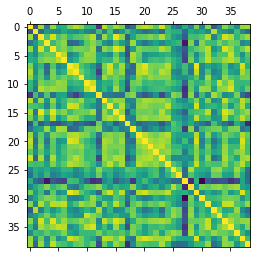

In [169]:
import matplotlib.pyplot as plt
plt.matshow(act_min_wage)


In [ ]:
labels = [c[:2] for c in act_min_wage.columns]

In [ ]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.matshow(act_min_wage, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

In [ ]:
import pandas as pd
dfs = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')

In [ ]:
for ndf in dfs:
  print(type(ndf))
  print(ndf)

In [ ]:
state_abbv=dfs[0]
type(state_abbv)

In [ ]:
state_abbv.head()
state_abbv.set_index('State/District', inplace =True)

In [ ]:
state_abbv.to_csv('/content/state_abbv.csv')

In [ ]:
state_abbv = pd.read_csv('/content/state_abbv.csv', index_col=0)
state_abbv.head()

In [ ]:
abbv_dict = state_abbv[['Postal Code']].to_dict()['Postal Code']
abbv_dict

In [ ]:
abbv_dict['Federal (FLSA)'] = "FLSA"
abbv_dict['Guam'] = 'GU'
abbv_dict['Puerto Rico'] = 'PR'
labels=[abbv_dict[c] for c in act_min_wage.columns]

In [ ]:
print(act_min_wage.columns)

In [ ]:
for i,j in abbv_dict.items():
  print(i,j)

In [ ]:
labels=[abbv_dict[c] for c in act_min_wage.columns]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.matshow(act_min_wage, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

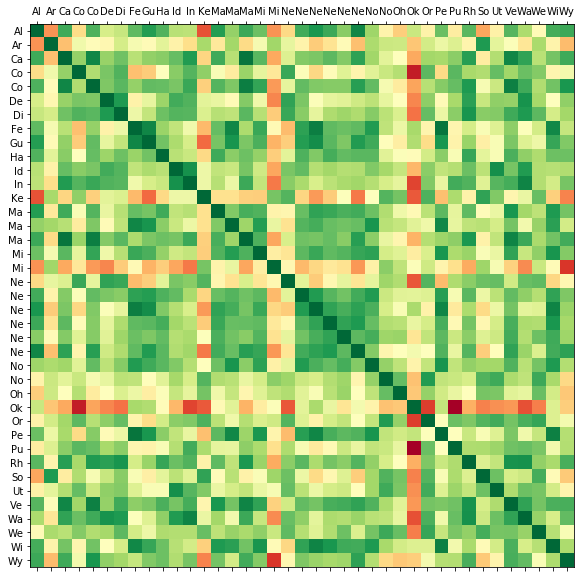

In [171]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.matshow(act_min_wage, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

In [0]:
import pandas as pd
dfs = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')

In [207]:
for ndf in dfs:
  print(type(ndf))
  print(ndf)

<class 'pandas.core.frame.DataFrame'>
          State/District Abbreviation Postal Code
0                Alabama         Ala.          AL
1                 Alaska       Alaska          AK
2                Arizona        Ariz.          AZ
3               Arkansas         Ark.          AR
4             California       Calif.          CA
5               Colorado        Colo.          CO
6            Connecticut        Conn.          CT
7               Delaware         Del.          DE
8   District of Columbia         D.C.          DC
9                Florida         Fla.          FL
10               Georgia          Ga.          GA
11                Hawaii       Hawaii          HI
12                 Idaho        Idaho          ID
13              Illinois         Ill.          IL
14               Indiana         Ind.          IN
15                  Iowa         Iowa          IA
16                Kansas        Kans.          KS
17              Kentucky          Ky.          KY
18          

In [208]:
state_abbv=dfs[0]
type(state_abbv)

pandas.core.frame.DataFrame

In [0]:
state_abbv.head()
state_abbv.set_index('State/District', inplace =True)

In [0]:
state_abbv.to_csv('/content/state_abbv.csv')

In [212]:
state_abbv = pd.read_csv('/content/state_abbv.csv', index_col=0)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [214]:
abbv_dict = state_abbv[['Postal Code']].to_dict()['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [0]:
abbv_dict['Federal (FLSA)'] = "FLSA"
abbv_dict['Guam'] = 'GU'
abbv_dict['Puerto Rico'] = 'PR'
labels=[abbv_dict[c] for c in act_min_wage.columns]

In [219]:
print(act_min_wage.columns)

Index(['Alaska', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Federal (FLSA)', 'Guam', 'Hawaii',
       'Idaho', 'Indiana', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')


In [220]:
for i,j in abbv_dict.items():
  print(i,j)

Alabama AL
Alaska AK
Arizona AZ
Arkansas AR
California CA
Colorado CO
Connecticut CT
Delaware DE
District of Columbia DC
Florida FL
Georgia GA
Hawaii HI
Idaho ID
Illinois IL
Indiana IN
Iowa IA
Kansas KS
Kentucky KY
Louisiana LA
Maine ME
Maryland MD
Massachusetts MA
Michigan MI
Minnesota MN
Mississippi MS
Missouri MO
Montana MT
Nebraska NE
Nevada NV
New Hampshire NH
New Jersey NJ
New Mexico NM
New York NY
North Carolina NC
North Dakota ND
Ohio OH
Oklahoma OK
Oregon OR
Pennsylvania PA
Rhode Island RI
South Carolina SC
South Dakota SD
Tennessee TN
Texas TX
Utah UT
Vermont VT
Virginia VA
Washington WA
West Virginia WV
Wisconsin WI
Wyoming WY
Federal (FLSA) FLSA
Guam GU
Puerto Rico PR


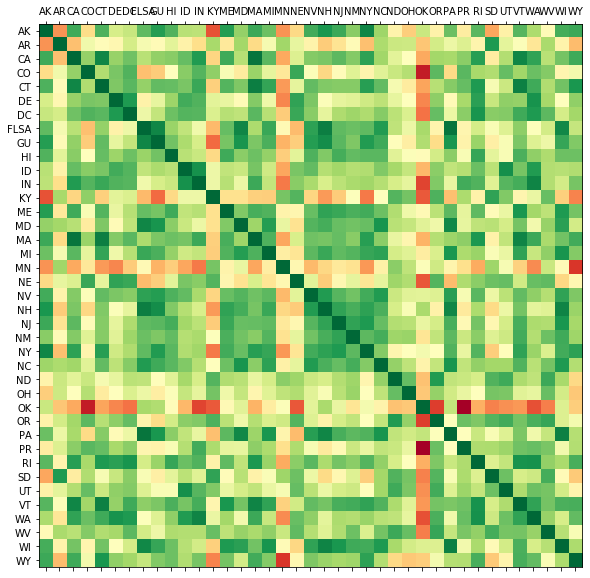

In [222]:
labels=[abbv_dict[c] for c in act_min_wage.columns]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
ax.matshow(act_min_wage, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()